# Optimization and Gradient Descent Lecture

Ron Li (credit Frank and Chyld)

## Objectives

 * Explain how gradient descent works
 * Use gradient descent to optimize a cost function
 * Explain the advantage of stochastic gradient descent
 
The point of this lecture is expose you to what's happening behind the scenes when you are calling `.fit` on some of sklearn's machine learning models to determine model coefficients (a.k.a. $\beta$, $\theta$, parameters, weights)  

This same process also helps determine weights in a neural network - so we will revisit this topic when talk neural nets.  

**Gradient Descent is not a machine learning model - it's a way of solving for coefficients** (in some model) given coefficients that need to be determined, true and predicted target values (from the model that uses the coefficients), and a **cost function** that quantifies how different the the predicted and true values are across the training data.

### Pattern of today's lecture
1. Code first
2. Visualization follows
3. Math at the end

## Interactive Demonstrations

- https://github.com/Shathra/gradient-descent-demonstration
- https://remykarem.github.io/backpropagation-demo/

## A 1-dimension example, finding the min of a cost function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
def cost_func(x): # the function to minimize
    return 3*x**2

def grad_cost_func(x): # gradient of the cost function
    return 6*x

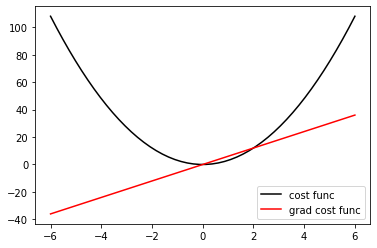

In [3]:
fig, ax = plt.subplots()
x = np.linspace(-6,6)
ax.plot(x, cost_func(x), c='black', label='cost func')
ax.plot(x, grad_cost_func(x), c='red', label = 'grad cost func')

ax.legend();

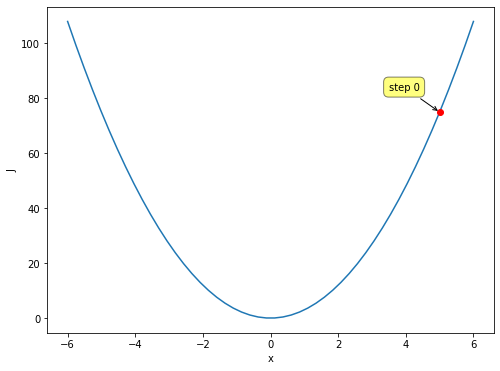

In [4]:
# keeping our guesses in a list for reasons that will become clear later....
guesses = [5]

def plot_cost(x_guess):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111) 
    x = np.linspace(-6, 6)
    y = cost_func(x)
    ax.plot(x, y)
    y_guess = [cost_func(xg) for xg in x_guess]
    ax.plot(x_guess, y_guess, 'ro')
    ax.set_xlabel('x')
    ax.set_ylabel('J')
    
    labels = [f'step {i}' for i in range(len(x_guess))]
    for label, x, y in zip(labels, x_guess, y_guess):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

   
plot_cost(guesses)

In [5]:
grad = grad_cost_func(guesses[-1])
print(grad)

30


The following code block moves the first guess to the minimum according to the gradient, multiplied by a learning rate.

In [6]:
learning_rate = .05

guess_update = guesses[-1] - learning_rate*grad # check against the formula below.
# let's keep our guesses in a list...
guesses.append(guess_update)

print(guesses)

[5, 3.5]


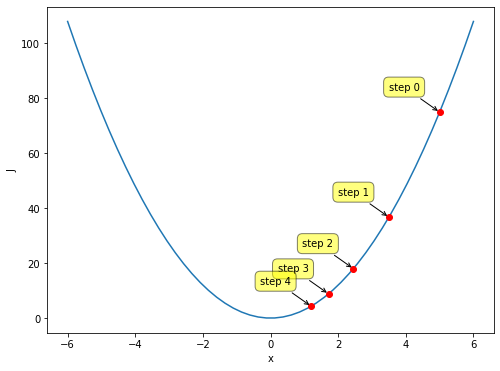

In [7]:
for _ in range(3):
    grad = grad_cost_func(guesses[-1])
    guess_update = guesses[-1] - learning_rate*grad
    guesses.append(guess_update)

plot_cost(guesses)

In [8]:
print("#\tguess")
for i, guess in enumerate(guesses,1):
    print("{0}\t{1:0.3f}".format(i, guess))

#	guess
1	5.000
2	3.500
3	2.450
4	1.715
5	1.200


A more non-trivial example:
![](https://github.com/Shathra/gradient-descent-demonstration/raw/master/gradient_descent_local_minima.gif)

#### What we learned from this example:
[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is a first-order iterative optimization algorithm for finding the minimum of a function.

To find a local minimum, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

$$ \beta_{new} = \beta_{old} - \alpha \cdot \frac{\nabla J}{\partial \beta}$$

$ \beta_{new} $ is the new estimate of the model coefficients  
$ \beta_{old} $ is the old estimate of the model coefficients  
$ \alpha $ is the learning rate, the tunable parameter that adjusts how much of a step is taken in the direction of the gradient  
$ \frac{\nabla J}{\partial \beta} $ is the gradient, a measure of how much the cost function is increasing with respect to each of the coefficients

## A 2-dimension example: Linear Regression Example
How does Scikit-learn solves the coefficients for you?
1. Analytical form?
2. Iterative computation?

In [9]:
xs = np.linspace(-5, 7)
ys = 3*xs - norm(5, 2).rvs(50)

Equation of a line for one feature

$y = mx + b$

$y = \beta_1x + \beta_0$

$y = 3x - 5$ :: **true model**

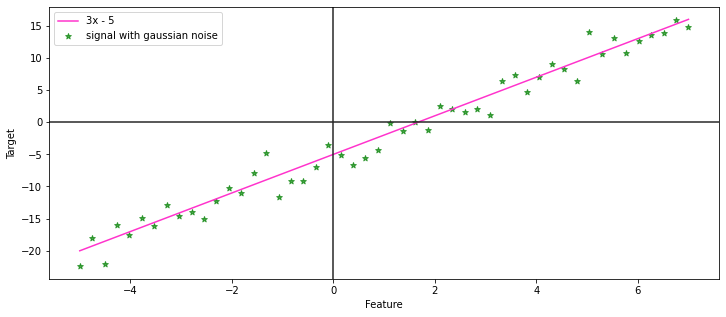

In [10]:
plt.figure(figsize=(12, 5))
plt.scatter(xs, ys, color='green', marker='*', alpha=0.7, label='signal with gaussian noise')
plt.plot(xs, 3*xs - 5, color='#ff33cc', label='3x - 5')
plt.axhline(0, color='#252525')
plt.axvline(0, color='#252525')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend();

### Loss

The loss function for linear regression is

$$\mathcal{L} = \sum_i (\beta_0 + \beta_1 x_i - y_i)^2$$

where $x_i$ are the values for our (one) feature and $y_i$ are the values for the target.

We want to find the values of $\beta_0$ and $\beta_1$ such that this loss function $\mathcal{L}$ is as small as possible.

The way we can do this is figure out which direction we can change the coefficients to make $\mathcal{L}$ smaller. We adjust the coefficients slightly in the direction, recalculate the direction, re-adjust, and repeat, again and again until we converge.

### _Assignment Alert: Logistic regression_

We want to find coefficients $\theta$ that *maximize* the likelihood of the classifying the true values correctly.

$$  L(\theta) = \sum_{i=1}^N (y_i \ln h_\theta (x_i) + (1- y_i)\ln(1- (h_\theta (x_i))) $$

$ h_\theta (x_i) $ is the predicted probability of the positive class.

To use gradient **descent** we would like to find a minimum instead of a maximum.  So we multiply the maximum likelihood by -1 to change the objective function in to a cost function.

$$  J(\theta) = -\sum_{i=1}^N (y_i \ln h_\theta (x_i) + (1- y_i)\ln(1- (h_\theta (x_i))) $$

This is equation is the [binary cross-entropy loss function](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a).  When it's extrapolated to more than two classes it's simply called [categorical cross entropy](https://machinelearningmastery.com/cross-entropy-for-machine-learning/).

In [11]:
def loss(y, y_hat):
    return ((y - y_hat) ** 2).mean()

In [12]:
# with the correct beta values, the loss is close to zero
loss(ys, 3*xs-5)

3.1884323514646007

In [13]:
# but as we deviate from the correct coefficients, then the loss increases
loss(ys, 9*xs+10)

905.5422342809278

In [14]:
np.meshgrid(np.arange(1, 10, 1), np.arange(5, 15, 1))


[array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[ 5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 6,  6,  6,  6,  6,  6,  6,  6,  6],
        [ 7,  7,  7,  7,  7,  7,  7,  7,  7],
        [ 8,  8,  8,  8,  8,  8,  8,  8,  8],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
        [10, 10, 10, 10, 10, 10, 10, 10, 10],
        [11, 11, 11, 11, 11, 11, 11, 11, 11],
        [12, 12, 12, 12, 12, 12, 12, 12, 12],
        [13, 13, 13, 13, 13, 13, 13, 13, 13],
        [14, 14, 14, 14, 14, 14, 14, 14, 14]])]

In [15]:
# xs.reshape(-1, 1, 1)

In [37]:
# here, we look at a range of potential beta values and show the loss as a contour plot
# we are looking at a 3D surface projected down onto 2D space with the center being the minimum loss
b0, b1 = np.meshgrid(np.arange(-10, 0, 0.05), np.arange(-2, 12, 0.05))
loss = ((b0 + b1 * xs.reshape(-1, 1, 1) - ys.reshape(-1, 1, 1)) ** 2).sum(axis=0)
b0.shape, b1.shape, loss.shape

((280, 200), (280, 200), (280, 200))

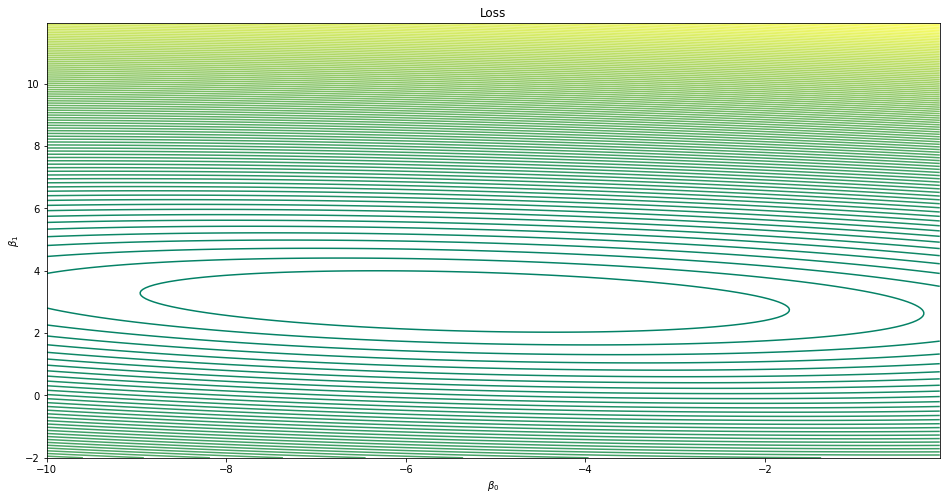

In [38]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.contour(b0, b1, loss, np.linspace(loss.min(), loss.max(), 100), cmap='summer') # https://matplotlib.org/tutorials/colors/colormaps.html
ax.set_xlabel(r"$\beta_0$")
ax.set_ylabel(r"$\beta_1$")
ax.set_title("Loss");

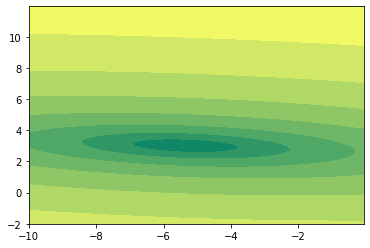

In [42]:
fig, ax = plt.subplots()
ax.contourf(b0, b1, np.log(loss), cmap='summer')

In [24]:
h

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

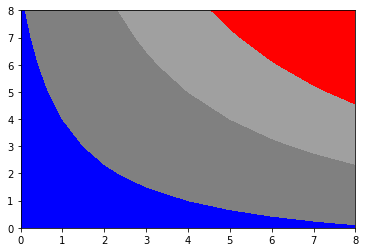

In [23]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

#### An interlude, looks familiar?
![](https://miro.medium.com/max/2604/1*lFnKhQwmxt8XvP4wTYYJbw.png)

### Normal Equation (analytical form)

One way to solve for the coefficients is using the **Normal Equation**

$(X^TX)^{-1}X^Ty$

####  as you can see, we have arrived at the correct beta values

In [28]:
X.shape

(50, 2)

In [25]:
X = np.hstack((xs.reshape(-1,1), np.ones(50).reshape(-1,1)))
np.linalg.inv(X.T @ X) @ (X.T @ ys)

array([ 3.01411643, -5.34356608])

However, imagine that we're unlucky, and $X^TX$ is a fairly dense matrix with a high percentage of nonzero entries. Storing a dense 100,000 by 100,000 element $X^TX$ matrix would then require $1×10^{10}$ floating point numbers (at 8 bytes per number, this comes to **80 gigabytes of RAM required**.) This would be impractical to store on anything but a supercomputer. We need to find a more memory efficient solution.

Enter differential calculus.

### Gradient Descent comes to the rescue

> As long as the cost function is **differentiable**, no matter how complicated, gradient descent can be used.

#### Minimal knowledge about differential calculus

In order to find the optimal coefficients, we need to take our loss function and find the derivative. Once we have the derivative, we can walk down the slope until we arrive at the bottom where the loss is minimal.

A derivative of a function (you should recall) is infinitesimal change in that function with an infinitesimal change in the argument.

**Exercise:** what is $\frac{df}{dx}$ for the following functions?

 * $f(x) = x$
 * $f(x) = x^2$
 * $f(x) = x^3$
 * $f(x) = 2x^2 - 3x - 12$
 * $f(x) = e^x$
 * $f(x) = sin(x^2)$

<details>
  <summary><b>Click to expand the answer</b></summary>
  
  1. $1$
  2. $2x$
  3. $3x^2$
  4. $4x -3$
  5. $e^x$
  6. $2x cos(x^2)$
</details>



When we have a function with multiple arguments, we take a partial  partial derivative with respect to each argument, which is done by treating all the other variables as constant.

**Exercise:** what are $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ for the following functions?

 * $f(x, y) = x^2 + y^2$
 * $f(x, y) = xy^2 + 3x^2y^2 + ye^x$
 
The vector $(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$ is called a *gradient*, and is in the direction of greatest increase of the function. The opposite direction is the greatest decrease.

**Exercise:** work out the gradient of the loss function, i.e., the vector of partial derivatives with respect to each parameter in our model.

$$\mathcal{L} = \sum_i (\beta_0 + \beta_1 x_i - y_i)^2$$

### So: the way gradient descent works is
 * Choose a starting point, a **learning rate**, and a threshold
 * Repeatedly:
     * Calculate the gradient at the current point,
     * Multiply the gradient by the negative of the learning rate
     * Add that to the current point to find a new point
     * Repeat until within the threshold
    
 

### The idea is the same when you have more than one variable to differentiate against, like $\beta_0$ and $\beta_1$.

$$ \nabla f = \sum_{i=1}^P\frac{\partial f}{\partial x_i} \vec{e_i}$$

where:  
$ \nabla f$ is the gradient of function $f$  
$ \sum_{i=1}^P$ is the sum over all the predictors (columns) $P$  
$ \frac{\partial f}{\partial x_i}$ is the partial derivative of $f$ with respect to predictor $x_i$  
$ e_i$ indicates in the direction of the predictor $x_i$

Simple example.  Say there were columns $x$, $y$, and $z$ in our X array, 
defined to go in directions $\vec{i}, \vec{j}, \vec{k}$.  
So $$ \nabla f = \frac{\partial f}{\partial x} \vec{i} + \frac{\partial f}{\partial y} \vec{j}+ \frac{\partial f}{\partial z} \vec{k}$$

Say $$ f(x,y,z) = 2x + 3y^{2} - sin(3z) $$

The gradient is:  

$$ \nabla f = 2\vec{i} + 6y\vec{j} - 3cos(3z)\vec{k} $$

![](https://github.com/Shathra/gradient-descent-demonstration/raw/master/gradient_descent_2d.gif)

### Let's take a look at the magnitude of the gradients (components).

In [29]:
def gradient(beta):
    return np.array((2*(beta[0] + beta[1]*xs - ys).sum(),              # d/dB0
                     2*(xs * (beta[0] + beta[1]*xs - ys)).sum()))      # d/dB1

In [31]:
np.array((-8,0))

array([-8,  0])

In [43]:
points = [np.array((-8,0))]                                         # starting values for b0 and b1
alpha = 0.0011                                                      # learning rate
slopes = [np.array((0,0))]                                          # tracking the gradient
for _ in range(200):                                                 # update our coefficients 20 times
    current_betas = points[-1]                                      # get most recent beta values
    slopes.append(gradient(current_betas))
    points.append(current_betas - alpha * gradient(current_betas))  # update beta values

points = np.array(points)
slopes = np.array(slopes)

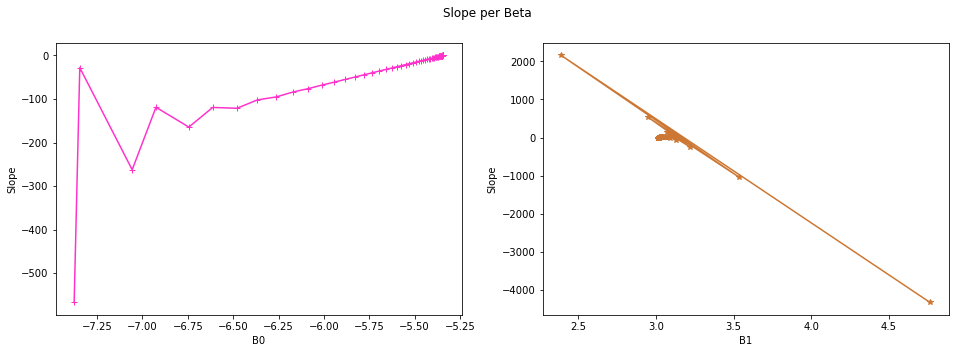

In [44]:
# let's look how the slope changes as we change each coefficient
# the slope for B0 and B1 approaches zero as gets closer to the target value
fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(16,5))
fig2.suptitle('Slope per Beta')
ax2a.plot(points[1:,0], slopes[1:, 0], color='#ff33cc', marker='+')
ax2a.set(xlabel='B0', ylabel='Slope')
ax2b.plot(points[1:,1], slopes[1:, 1], color='#cc7733', marker='*')
ax2b.set(xlabel='B1', ylabel='Slope');

### Let's see the 2D trajectory.

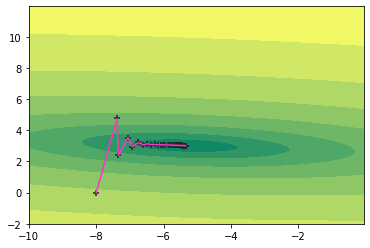

In [45]:
# we will now plot each set of beta values per update
ax.scatter(*points.T, color='#252525', marker='+')
ax.plot(*points.T, color='#ff33cc')
fig

## Limitations of naive gradient descent

Gradient descent has a few limitations. First, it's dependent on the size of the step. Too small and it takes a long time. Too big and it can overshoot.

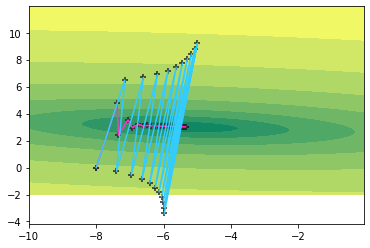

In [46]:
# we will make the learning rate slightly bigger
points = [np.array((-8,0))]                                         # starting values for b0 and b1
alpha = 0.0015                                                      # learning rate
slopes = [np.array((0,0))]                                          # tracking the gradient
for _ in range(20):                                                 # update our coefficients 20 times
    current_betas = points[-1]                                      # get most recent beta values
    slopes.append(gradient(current_betas))
    points.append(current_betas - alpha * gradient(current_betas))  # update beta values

points = np.array(points)
slopes = np.array(slopes)

# the betas are now getting worse with each update and will diverge to infinity
ax.scatter(*points.T, color='#252525', marker='+')
ax.plot(*points.T, color='#33ccff')
fig

### Stuck in local minimum.
![](https://github.com/Shathra/gradient-descent-demonstration/raw/master/gradient_descent_local_minima.gif)

## Beyond naive gradient descent
> More in this afternoon's lecture.
### Feature Scaling 

If the second derivative is the same in all directions it converges pretty well. If the farther it is from this (as above) the more trouble it has converging, because the initial learning rate takes too long to converge along the slower dimensions - where the second derivative is small.

This can mitigated by standardize/normalize the features.

![](https://cdn-images-1.medium.com/max/1024/0*MAnACOoi0DrOsKQS.jpeg)

### Global Minima

Gradient descent is not guaranteed to find find a global minimum, only the local. This isn't a problem here or with logistic regression (there's only one minimum) but is for other problems. Finding the global minimum is a difficult problem that does not have a solution general, though there are techniques that do better than others. One approach is too try multiple starting points and make sure they converge to the same value.

![](https://www.i2tutorials.com/wp-content/media/2019/09/Neural-network-32-i2tutorials.png)

### Convergence Criteria

Here are some choices for when you'd like your algorithm to halt.

 * Change in loss $ (loss_{old} - loss_{new}) / loss_{old} < \epsilon $, i.e., the loss is not changing much between updates
 * Magnitude of gradient $|\nabla f| < \epsilon$, i.e., the gradient is very small
 * Maximum number of iterations
 


### Stochastic Gradient Descent, SGD

One of the challenges of gradient descent is that it requires all the data to be in memory at each step. That's a problem for Big Data situations when you have more data then can fit in memory.

One solution to this is **stochastic gradient descent** (SGD), in which we make a step for *each data point* (choosen in random order), so we one need one data point in memory at the same time. Since the loss function is the sum of the loss functions associated with each data point, the average effect of a tiny step for each point is the same as one step for the whole sample.

A less extreme alternative is **mini-batch stochastic gradient descent** in which we use a small number of data points for each step.

SGD has a couple other advantages. First, it allowed on-line training; it can incorporate additional data easily and train to that. Second, the random data points help it prevent local minima.

![](https://suniljangirblog.files.wordpress.com/2018/12/descent.png)


<img src="https://i.imgur.com/htB03jt.jpg" width="40%">